In [227]:
#Imports
import numpy as np
import pandas as pd
import pylab as pb
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf as acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.tsa.api as smt
from scipy.optimize import leastsq
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMAResults 

In [228]:
#Read data as panda.DataFrame
pdData = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col='Month')

#Also save as numpy array
npData = pdData.as_matrix();

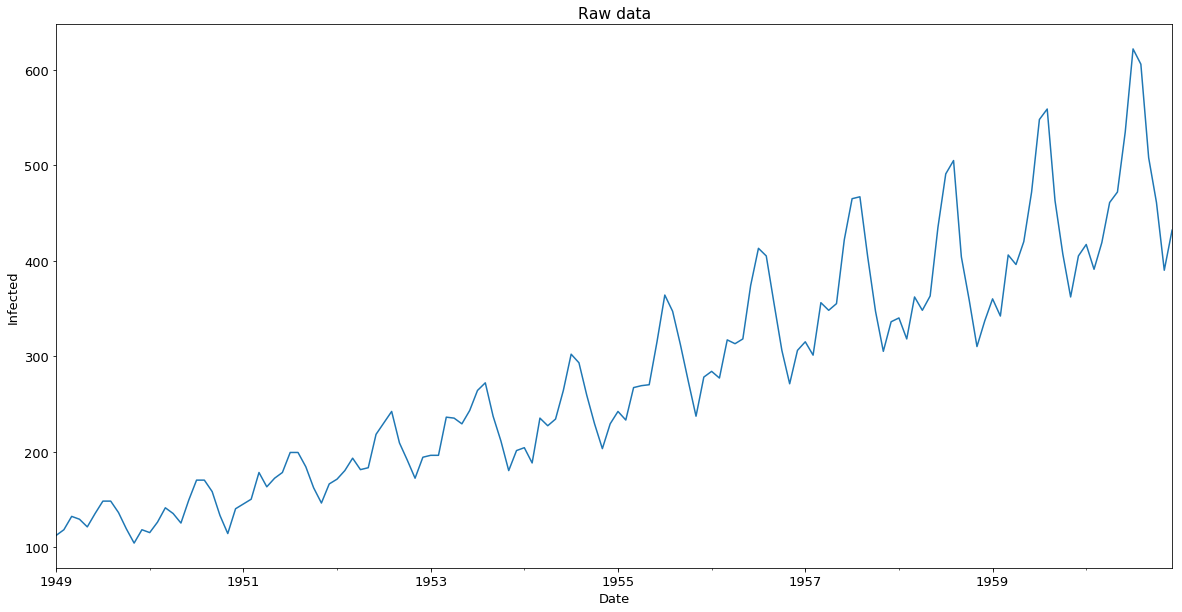



This is what the raw data looks like.


In [229]:
fig, ax = pb.subplots(1,1,figsize=(20,10))
pdData.plot(ax=ax,legend="")
ax.set_xlabel("Date")
ax.set_ylabel("Infected")
ax.set_title("Raw data")
#pb.savefig("Data.png")
pb.show()

print("\n\nThis is what the raw data looks like.")

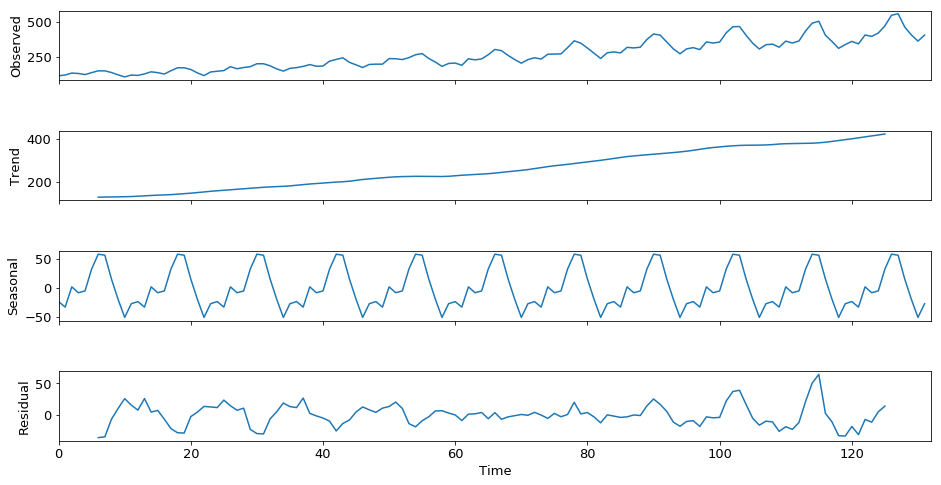

In [219]:
#Create a trend, seasonal decomposition and residual using statsmodels
pb.rcParams.update({'font.size': 13})
decomp = smt.seasonal_decompose(pdData[:-12].as_matrix(),freq=12);

fig = decomp.plot()  
fig.set_size_inches(15, 8)
#pb.savefig("seasonal_decompose.png")
pb.show()

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

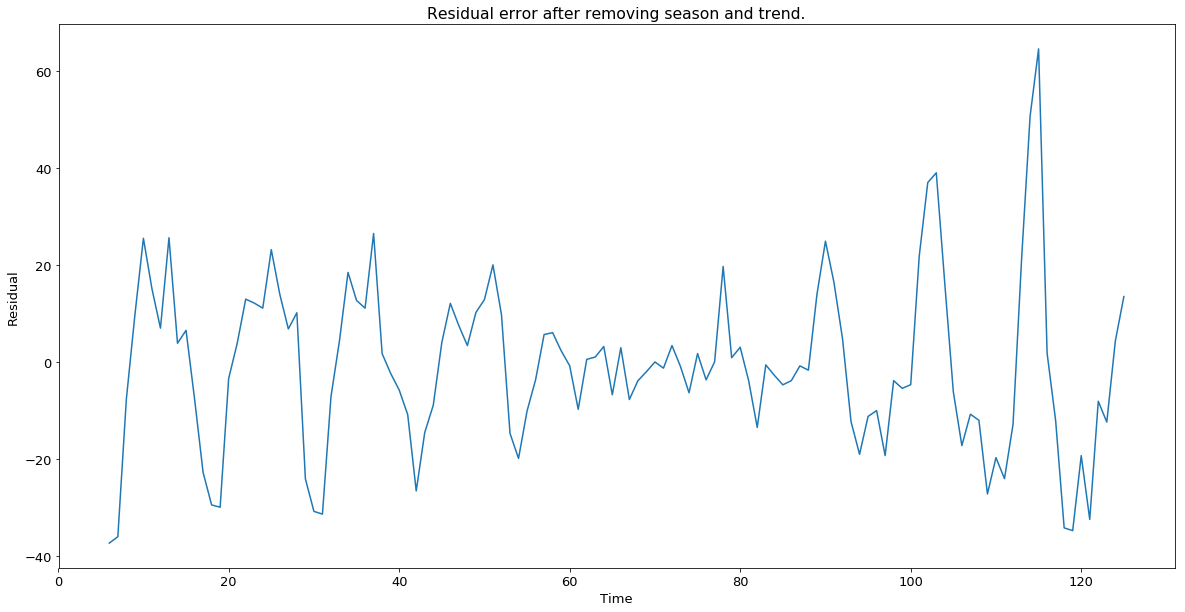



A closer look at the residual.


In [220]:
fig, ax = pb.subplots(1,1,figsize=(20,10))
ax.plot(residual)
ax.set_xlabel("Time")
ax.set_ylabel("Residual")
ax.set_title("Residual error after removing season and trend.")
pb.show()

print("\n\nA closer look at the residual.")

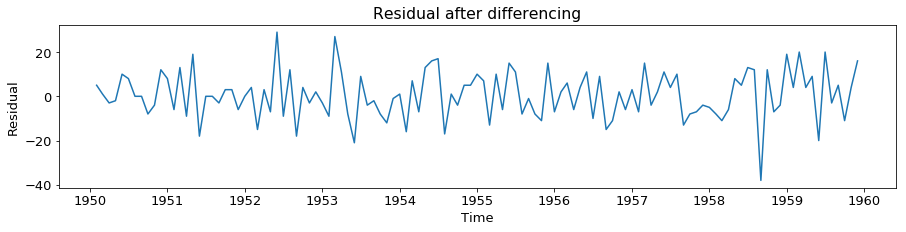

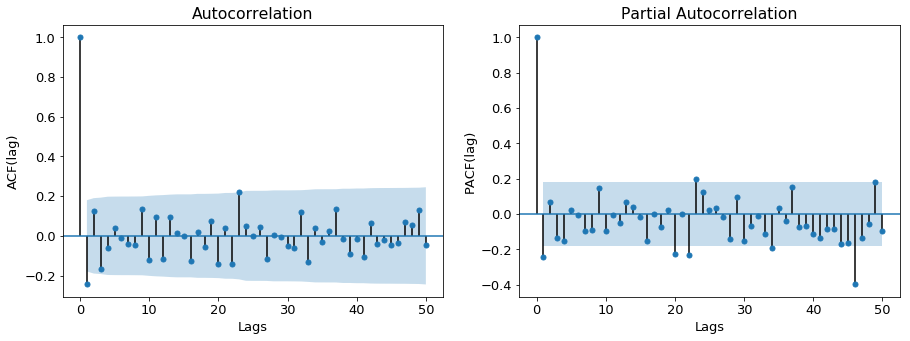

In [221]:
#Using differecing instead of statsmodels own residual.

#Difference by 12 and 1 to remove yearly component and linear trend.
differenciated_data = pdData[:-12].diff(12).diff(1)

pb.figure(figsize=(15,3))
pb.plot(differenciated_data)
pb.title("Residual after differencing")
pb.xlabel("Time")
pb.ylabel("Residual")
pb.show()

fig, ax = pb.subplots(1,2,figsize=(15,5))
plot_acf(differenciated_data.Passengers.tolist()[13:],ax=ax[0],lags=50,label="d=1, s=12")
plot_pacf(differenciated_data.Passengers.tolist()[13:],ax=ax[1],lags=50)
ax[0].set_xlabel("Lags")
ax[1].set_xlabel("Lags")
ax[0].set_ylabel("ACF(lag)")
ax[1].set_ylabel("PACF(lag)")
#pb.savefig("acf_pacf_1_12.png")
pb.show()


In [166]:
#Gridsearch using aic valyue. Best model found to be: (2,1,2)x(0,2,2)12
import warnings
warnings.filterwarnings('ignore')

p = [0,1,2];
d = [0,1]
q = [0,1,2];
P = [0,1,2]
Q = [0,1,2]
D = [0,1,2]

for i in p:
    for j in d:
        for k in q:
            for l in P:
                for m in D:
                    for n in Q:
                        mod = smt.statespace.SARIMAX(pdData.as_matrix(),
                                                     order=(i,j,k), seasonal_order=(l,m,n,12),
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)
                        results = mod.fit()
                        print("({},{},{})x({},{},{})12: ".format(i,j,k,l,m,n) + repr(results.aic))

(0,0,0)x(0,0,0)12: 2044.4329486427587
(0,0,0)x(0,0,1)12: 1887.025460544372
(0,0,0)x(0,0,2)12: 1498.2861803083933
(0,0,0)x(0,1,0)12: 1315.9211929474204
(0,0,0)x(0,1,1)12: 1156.2914901508545
(0,0,0)x(0,1,2)12: 1016.136279733741
(0,0,0)x(0,2,0)12: 1103.8641596218804
(0,0,0)x(0,2,1)12: 942.1856088449069
(0,0,0)x(0,2,2)12: 834.3017303458474
(0,0,0)x(1,0,0)12: 1118.6259190717344
(0,0,0)x(1,0,1)12: 1107.2562043239823
(0,0,0)x(1,0,2)12: 1014.6452265989878
(0,0,0)x(1,1,0)12: 1109.2437994445113
(0,0,0)x(1,1,1)12: 1033.6172166730155
(0,0,0)x(1,1,2)12: 904.4213211126895
(0,0,0)x(1,2,0)12: 974.4396269851046
(0,0,0)x(1,2,1)12: 940.2370895732636
(0,0,0)x(1,2,2)12: 835.2218828481894
(0,0,0)x(2,0,0)12: 1024.7669132306019
(0,0,0)x(2,0,1)12: 1020.0652426444881
(0,0,0)x(2,0,2)12: 1014.010730896984
(0,0,0)x(2,1,0)12: 976.4373805907882
(0,0,0)x(2,1,1)12: 934.9124902566273
(0,0,0)x(2,1,2)12: 925.1719299580599
(0,0,0)x(2,2,0)12: 865.965222543489
(0,0,0)x(2,2,1)12: 847.7010594193896
(0,0,0)x(2,2,2)12: 840.1148

(1,0,2)x(0,1,2)12: 836.4811525976676
(1,0,2)x(0,2,0)12: 993.8462787299345
(1,0,2)x(0,2,1)12: 832.6688985548936
(1,0,2)x(0,2,2)12: 731.830527148353
(1,0,2)x(1,0,0)12: 1010.7058013659775
(1,0,2)x(1,0,1)12: 984.2779181577902
(1,0,2)x(1,0,2)12: 903.636690971736
(1,0,2)x(1,1,0)12: 937.6961869274334
(1,0,2)x(1,1,1)12: 929.5691069579042
(1,0,2)x(1,1,2)12: 825.1236832024192
(1,0,2)x(1,2,0)12: 868.2549643952233
(1,0,2)x(1,2,1)12: 829.8985460395904
(1,0,2)x(1,2,2)12: 733.8283091001452
(1,0,2)x(2,0,0)12: 915.3744975837384
(1,0,2)x(2,0,1)12: 916.8867888002741
(1,0,2)x(2,0,2)12: 900.9884896147646
(1,0,2)x(2,1,0)12: 849.827873777864
(1,0,2)x(2,1,1)12: 848.0651892636187
(1,0,2)x(2,1,2)12: 831.9726664512568
(1,0,2)x(2,2,0)12: 767.8346067620196
(1,0,2)x(2,2,1)12: 753.8303398307504
(1,0,2)x(2,2,2)12: 738.5770245842098
(1,1,0)x(0,0,0)12: 1392.9437938537153
(1,1,0)x(0,0,1)12: 1190.534292907666
(1,1,0)x(0,0,2)12: 1045.5148012569048
(1,1,0)x(0,1,0)12: 1013.3680449838108
(1,1,0)x(0,1,1)12: 928.1312837305552


(2,1,1)x(1,0,1)12: 988.2528465018177
(2,1,1)x(1,0,2)12: 908.1966106863059
(2,1,1)x(1,1,0)12: 923.849055326209
(2,1,1)x(1,1,1)12: 924.8761751693107
(2,1,1)x(1,1,2)12: 838.6164301498296
(2,1,1)x(1,2,0)12: 852.1075393913371
(2,1,1)x(1,2,1)12: 831.7562390792949
(2,1,1)x(1,2,2)12: 735.9693011786969
(2,1,1)x(2,0,0)12: 904.0156533204465
(2,1,1)x(2,0,1)12: 906.1278376763275
(2,1,1)x(2,0,2)12: 906.2199038873111
(2,1,1)x(2,1,0)12: 836.1351620753765
(2,1,1)x(2,1,1)12: 884.1749931552587
(2,1,1)x(2,1,2)12: 1584.7999434838314
(2,1,1)x(2,2,0)12: 751.5144968883625
(2,1,1)x(2,2,1)12: 739.0729809784901
(2,1,1)x(2,2,2)12: 741.3518374536987
(2,1,2)x(0,0,0)12: 1328.141539192674
(2,1,2)x(0,0,1)12: 1140.775223145833
(2,1,2)x(0,0,2)12: 1003.5443603052478
(2,1,2)x(0,1,0)12: 997.8501085212087
(2,1,2)x(0,1,1)12: 911.6980162078902
(2,1,2)x(0,1,2)12: 826.4847837623179
(2,1,2)x(0,2,0)12: 990.1168864242358
(2,1,2)x(0,2,1)12: 832.2619587021131
(2,1,2)x(0,2,2)12: 715.1571073638156
(2,1,2)x(1,0,0)12: 1003.2709742111267

In [222]:
#Fit the model
mod = smt.statespace.SARIMAX(pdData.as_matrix(),
                             order=(2,1,2), seasonal_order=(0,2,2,12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
results = mod.fit()
print(results.aic)

715.1571073638156


In [176]:
??smt.statespace.SARIMAX

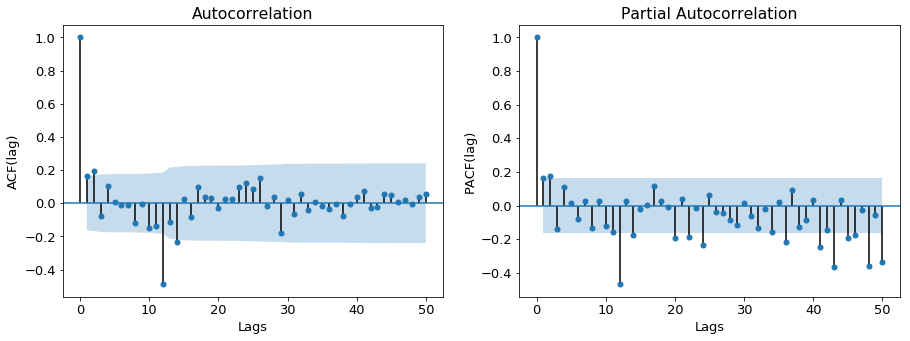

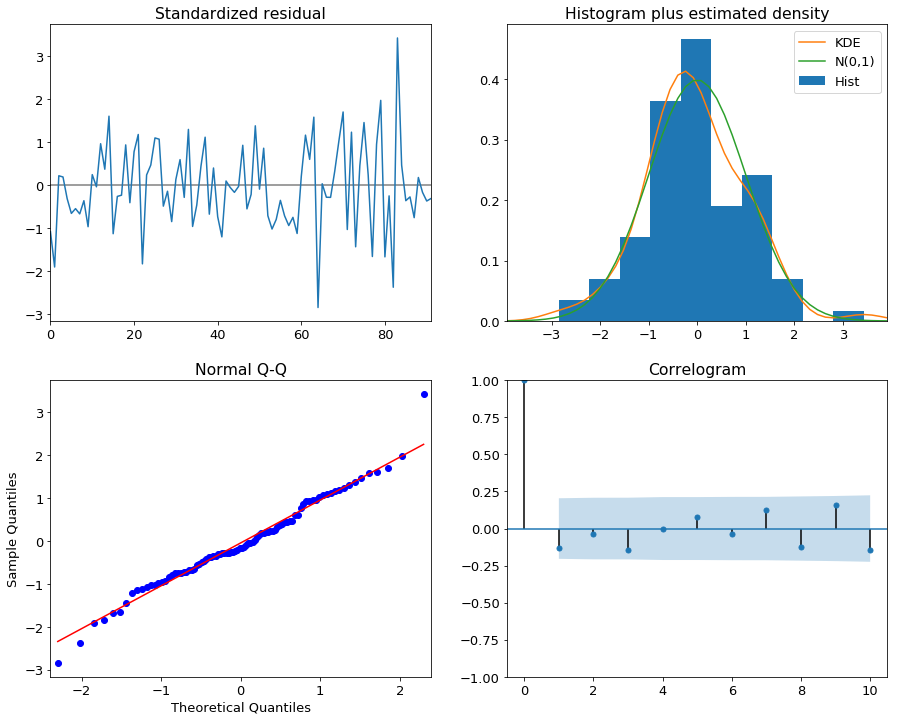



Dickey-Fuller p-value: 2.953439106859901e-11


In [225]:
#Plot stuff to see if we got a good fit
fig, ax = pb.subplots(1,2,figsize=(15,5))
plot_acf(results.resid[:],lags=50,ax=ax[0])
ax[0].set_xlabel("Lags")
ax[0].set_ylabel("ACF(lag)")
plot_pacf(results.resid[:],lags=50,ax=ax[1])
ax[1].set_xlabel("Lags")
ax[1].set_ylabel("PACF(lag)")
#pb.savefig("acf_pacf_resid_after_modelfit.png")
pb.show()
f = results.plot_diagnostics(figsize=(15, 12))
#pb.savefig("model_diagnostics.png")
pb.show()

#Check dickey-fuller p-value if it's low enough
print("\n\nDickey-Fuller p-value: " + repr(adfuller(results.resid)[1]))

### Future predictions

The model captures the time series pretty good, and diverges slightly over time as is to be expected.


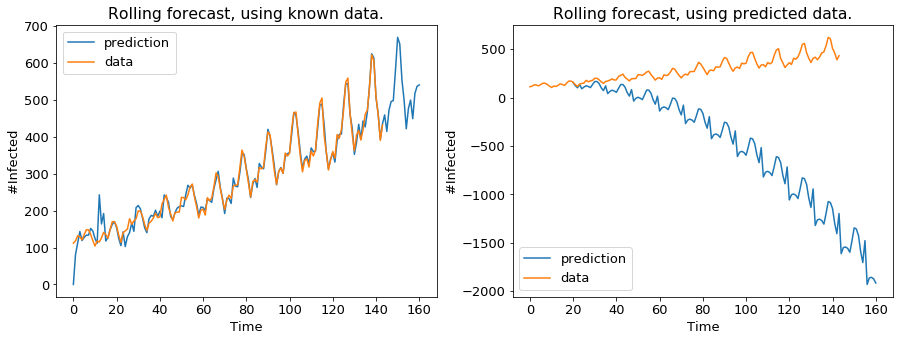

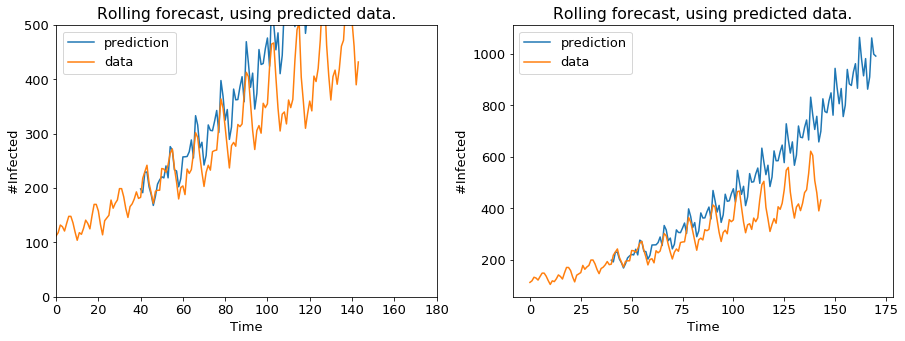

In [226]:
pb.close()
pred1 = results.get_prediction(start = 0, end= 160,dynamic=False) 
pred2 = results.get_prediction(start = 20, end= 160,dynamic=True) 
fig, ax  = pb.subplots(1,2,figsize=(15,5))
ax[0].plot(np.arange(0,161), pred1.predicted_mean,label="prediction")
ax[0].plot(pdData.as_matrix(),label="data")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("#Infected")
ax[0].set_title("Rolling forecast, using known data.")
ax[0].legend()
ax[1].plot(np.arange(20,161), pred2.predicted_mean,label="prediction")
ax[1].plot(pdData.as_matrix(),label="data")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("#Infected")
ax[1].set_title("Rolling forecast, using predicted data.")
ax[1].legend()
#pb.savefig("forecasting_known_data.png")
pb.show()

pred3 = results.get_prediction(start = 40 , end= 170,dynamic=True)
pred4 = results.get_prediction(start = 40, end= 170,dynamic=True)
fig, ax = pb.subplots(1,2,figsize=(15,5))
ax[0].plot(np.arange(40,171),pred3.predicted_mean,label="prediction")
ax[0].plot(pdData.as_matrix(),label="data")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("#Infected")
ax[0].set_title("Rolling forecast, using predicted data.")
ax[0].legend()
ax[0].set_xlim(0,180)
ax[0].set_ylim(0,500)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("#Infected")
ax[1].plot(np.arange(40,171), pred4.predicted_mean,label="prediction")
ax[1].plot(pdData.as_matrix(),label="data")
ax[1].set_title("Rolling forecast, using predicted data.")
ax[1].legend()
#pb.savefig("forecasting_future.png")
pb.show()